<a href="https://colab.research.google.com/github/Duckucy/113-2_Programing_Language/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install jieba wordcloud matplotlib pandas

In [4]:
from google.colab import files
import pandas as pd

# 上傳 CSV 檔案
uploaded = files.upload()

# 假設檔名為 IMDB Dataset.csv
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
import re
from collections import Counter

# 取前 5000 筆資料避免記憶體不足
text = ' '.join(df['review'][:5000].tolist())

# 清理 HTML 標籤與標點
text = re.sub(r'<.*?>', ' ', text)
text = re.sub(r'[^a-zA-Z\s]', '', text)
text = text.lower()

# 使用簡單空白分詞
tokens = text.split()

# 自訂英文停用詞（簡化版）
stopwords = set([
    'the', 'and', 'is', 'in', 'it', 'of', 'to', 'this', 'that', 'a', 'an',
    'i', 'was', 'for', 'on', 'with', 'as', 'but', 'not', 'be', 'are', 'have',
    'you', 'he', 'she', 'they', 'we', 'at', 'by', 'from', 'has', 'had', 'his',
    'her', 'its', 'my', 'me', 'so', 'if', 'or', 'just', 'about', 'what', 'when',
    'who', 'which', 'them', 'their', 'there'
])

# 過濾停用詞與短字
filtered_words = [word for word in tokens if word not in stopwords and len(word) > 1]

# 統計詞頻
word_freq = Counter(filtered_words)
top_20 = word_freq.most_common(20)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31558 (\N{CJK UNIFIED IDEOGRAPH-7B46}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


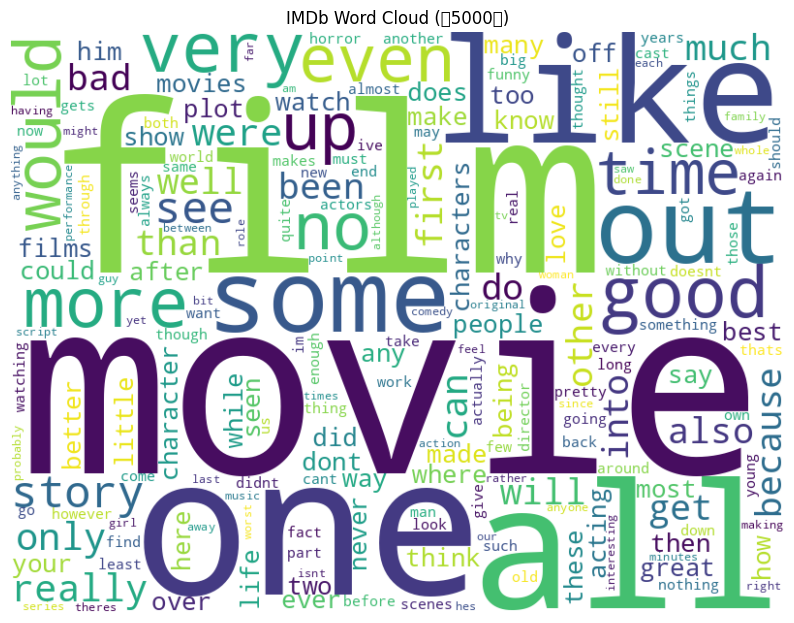

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 產生文字雲
wc = WordCloud(width=800, height=600, background_color='white')
wc.generate_from_frequencies(word_freq)

# 顯示
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("IMDb Word Cloud (前5000筆)")
plt.show()

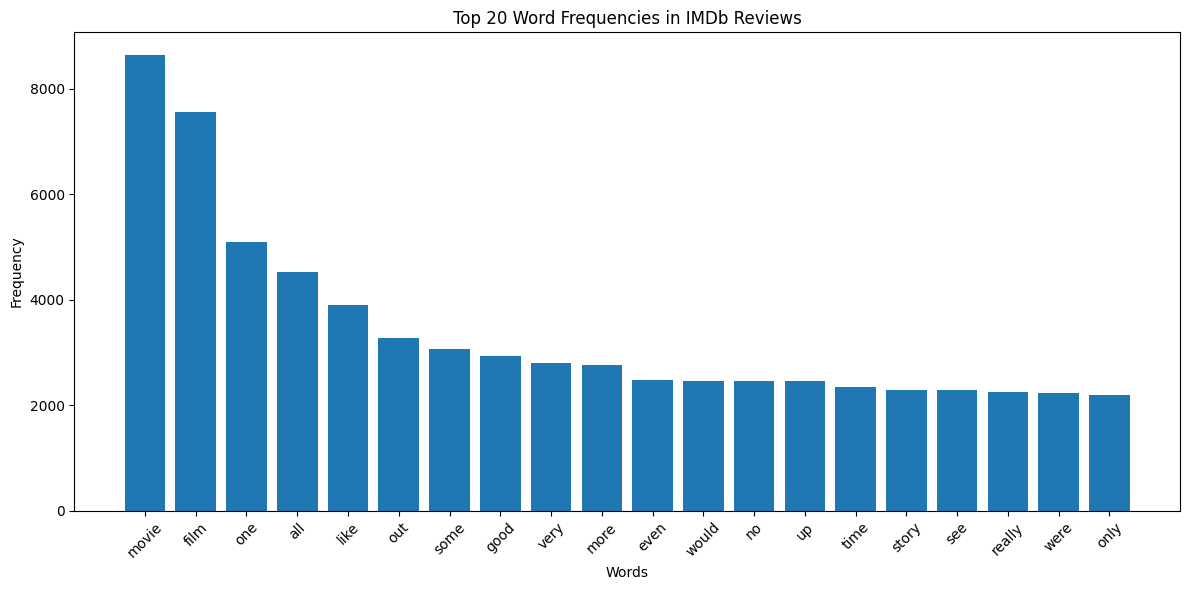

In [7]:
# 提取詞語與對應數量
words, counts = zip(*top_20)

# 畫出長條圖
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Word Frequencies in IMDb Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()